# 11. Sampling Methods

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(1234)

### 11.1.2 Rejection sampling

In [3]:
from scipy.stats import multivariate_normal as mn
def func(x): return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)

x = np.linspace(-5, 10, 100)
rv = mn(mean=np.array([2.]), cov=np.array([2.]))

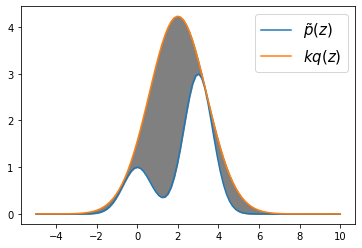

In [4]:
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.plot(x, 15 * rv.pdf(x), label=r"$kq(z)$")
plt.fill_between(x, func(x), 15 * rv.pdf(x), color="gray")
plt.legend(fontsize=15)
plt.show()

The accept probability is 
$$\frac{f(x)}{k\cdot p(x)}$$

In [5]:
def rejection_sampling(func, sampler, k, n):
    sample = []
    while len(sample) < n:
        sample_candidate = rv.rvs()
        accept_proba = func(sample_candidate) / (k * rv.pdf(sample_candidate))
        if np.random.random() < accept_proba: sample.append(sample_candidate)
    return np.asarray(sample)

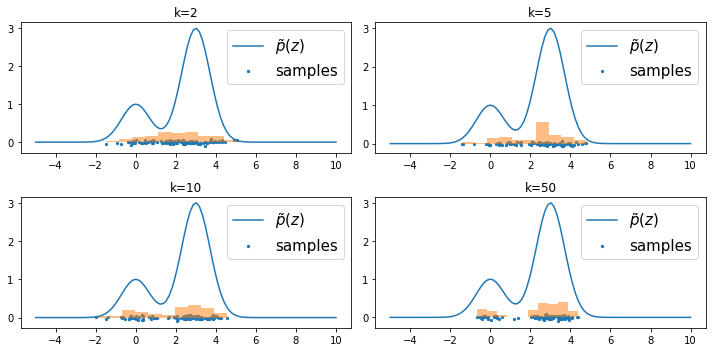

In [16]:
plt.figure(figsize=(10, 5))
for i, k in enumerate([2, 5, 10, 50]):
    plt.subplot(2, 2, i+1)
    samples = rejection_sampling(func, rv, k, n=100)
    plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
    plt.hist(samples, density=True, alpha=0.5)
    plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
    plt.legend(fontsize=15)
    plt.title(f"k={k}")
plt.tight_layout()
plt.show()

### 11.1.5 Sampling-importance-resampling

In [29]:
samples = sir(func, rv, n=100)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()

NameError: name 'sir' is not defined

## 11.2 Markov Chain Monte Carlo

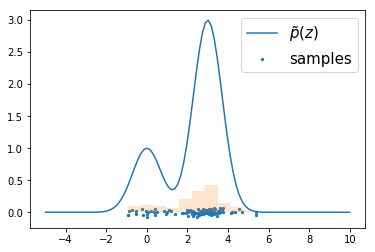

In [5]:
samples = metropolis(func, Gaussian(mu=np.zeros(1), var=np.ones(1)), n=100, downsample=10)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()

### 11.2.2 The Metropolis-Hastings algorithm

In [ ]:
def metropolis_hastings():
    x = np.zeros((1, rv.ndim))
    sample = []
    for i in range(n * downsample):
        x_new = x + rv.draw()
        accept_proba = func(x_new) * rv.pdf(x - x_new) / (func(x) * rv.pdf(x_new - x))
        if random.random() < accept_proba:
            x = x_new
        if i % downsample == 0:
            sample.append(x[0])
    sample = np.asarray(sample)
    assert sample.shape == (n, rv.ndim), sample.shape
    return sample

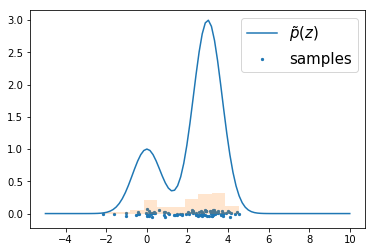

In [6]:
samples = metropolis_hastings(func, Gaussian(mu=np.ones(1), var=np.ones(1)), n=100, downsample=10)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()